<a href="https://colab.research.google.com/github/tiadwi/GoogleBangkit-MaskClassification/blob/master/dataprep_maskprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation for Mask Prediction Dataset

This colab is a data preparation for Mask Prediction Dataset ([link](https://www.kaggle.com/ahmetfurkandemr/mask-datasets-v1)).

The purpose of this colab is to provide insights about the dataset.

In [1]:
#@title Download the dataset to the VM

from google.colab import files

# Choose the kaggle.json API file that contain the credentials of your account
# kaggle.json file can be downloaded on your Kaggle profile
files.upload()
!mkdir ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the file to the VM
import kaggle

!kaggle datasets download -d ahmetfurkandemr/mask-datasets-v1
!unzip mask-datasets-v1.zip

Saving kaggle.json to kaggle.json
 99% 747M/754M [00:11<00:00, 67.4MB/s]
100% 754M/754M [00:11<00:00, 69.8MB/s]
Archive:  mask-datasets-v1.zip
  inflating: Mask_Datasets/Train/Mask/1.PNG  
  inflating: Mask_Datasets/Train/Mask/10.PNG  
  inflating: Mask_Datasets/Train/Mask/100.PNG  
  inflating: Mask_Datasets/Train/Mask/101.PNG  
  inflating: Mask_Datasets/Train/Mask/102.PNG  
  inflating: Mask_Datasets/Train/Mask/103.PNG  
  inflating: Mask_Datasets/Train/Mask/104.PNG  
  inflating: Mask_Datasets/Train/Mask/105.PNG  
  inflating: Mask_Datasets/Train/Mask/106.PNG  
  inflating: Mask_Datasets/Train/Mask/107.PNG  
  inflating: Mask_Datasets/Train/Mask/108.PNG  
  inflating: Mask_Datasets/Train/Mask/109.PNG  
  inflating: Mask_Datasets/Train/Mask/11.PNG  
  inflating: Mask_Datasets/Train/Mask/110.PNG  
  inflating: Mask_Datasets/Train/Mask/111.PNG  
  inflating: Mask_Datasets/Train/Mask/112.PNG  
  inflating: Mask_Datasets/Train/Mask/113.PNG  
  inflating: Mask_Datasets/Train/Mask/114.PNG

In [4]:
#@title List the dataset's directory

import os

train_mask_dir = os.path.join('/content/Mask_Datasets/Train/Mask')
train_nomask_dir = os.path.join('/content/Mask_Datasets/Train/No_mask')
valid_mask_dir = os.path.join('/content/Mask_Datasets/Validation/Mask')
valid_nomask_dir = os.path.join('/content/Mask_Datasets/Validation/No_mask')

datadir = [train_mask_dir, train_nomask_dir, valid_mask_dir, valid_nomask_dir]

# Display the number of the images
print('total training mask images:', len(os.listdir(train_mask_dir)))
print('total training no mask images:', len(os.listdir(train_nomask_dir)))
print('total validation mask images:', len(os.listdir(valid_mask_dir)))
print('total validation no mask images:', len(os.listdir(valid_nomask_dir)))
print('total images:', len(os.listdir(train_mask_dir))
                      + len(os.listdir(train_nomask_dir))
                      + len(os.listdir(valid_mask_dir))
                      + len(os.listdir(valid_nomask_dir)))

total training mask images: 350
total training no mask images: 400
total validation mask images: 150
total validation no mask images: 200
total images: 1100


In [5]:
#@title Obtain the metadata of all images

!pip install hachoir
from hachoir.parser import createParser
from hachoir.metadata import extractMetadata

# Define function to obtain MIME type, Image width, Image height, Pixel format,
# Bits/pixel, and File size information from all images in a directory
meta = []
def img_info(path):
  for file in os.listdir(path):
    filepath = "/".join([path,file])
    parser = createParser(filepath)
    metadata = extractMetadata(parser)

    a = metadata.exportDictionary()
    meta.append([file,
                 a['Metadata']['MIME type'].split("/")[1], 
                 a['Metadata']['Image width'].split(" ")[0],
                 a['Metadata']['Image height'].split(" ")[0],
                 a['Metadata']['Pixel format'],
                 a['Metadata']['Bits/pixel'],
                 os.path.getsize(filepath)])

# Apply the function to all dataset's directory
for dirs in datadir:
  img_info(dirs)

     |████████████████████████████████| 645kB 5.0MB/s 


In [7]:
#@title Convert metadata from list to pandas dataframe

import pandas as pd

df = pd.DataFrame(meta, columns=['File Name', 'Format', 'Image Width',
                                 'Image Height', 'Pixel Format', 'Bit per Pixel',
                                 'File Size'])
col = ['Image Width', 'Image Height', 'Bit per Pixel', 'File Size']
for item in col:
  df[item] = df[item].astype('float64')
df['Format'] = df['Format'].astype('category')
df['Pixel Format'] = df['Pixel Format'].astype('category')
df['File Size'] = df['File Size'] * 1e-6 # Convert the file size from KB to MB
df.head(20) # View first 20 value of the dataframe

,File Name,Format,Image Width,Image Height,Pixel Format,Bit per Pixel,File Size
0,216.PNG,png,145.0,155.0,RGBA,32.0,0.052664
1,113.PNG,png,205.0,285.0,RGBA,32.0,0.143474
2,150.PNG,png,134.0,144.0,RGBA,32.0,0.056415
3,68.PNG,png,247.0,245.0,RGBA,32.0,0.158160
4,34.PNG,png,454.0,349.0,RGBA,32.0,0.410593
5,267.PNG,png,58.0,78.0,RGBA,32.0,0.012420
6,196.PNG,png,204.0,205.0,RGBA,32.0,0.090344
7,9.PNG,png,116.0,127.0,RGBA,32.0,0.045067
8,160.PNG,png,167.0,164.0,RGBA,32.0,0.060453
9,189.PNG,png,213.0,204.0,RGBA,32.0,0.128113


In [8]:
#@title View the dataframe's information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   File Name      1100 non-null   object  
 1   Format         1100 non-null   category
 2   Image Width    1100 non-null   float64 
 3   Image Height   1100 non-null   float64 
 4   Pixel Format   1100 non-null   category
 5   Bit per Pixel  1100 non-null   float64 
 6   File Size      1100 non-null   float64 
dtypes: category(2), float64(4), object(1)
memory usage: 45.4+ KB


In [9]:
#@title View some basic stats of the dataframe

df.describe()

,Image Width,Image Height,Bit per Pixel,File Size
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,601.377273,610.661818,27.636364,0.718203
std,409.484656,401.884678,3.985249,0.647181
min,57.000000,74.000000,24.000000,0.005432
25%,193.250000,211.000000,24.000000,0.074541
50%,417.000000,469.500000,24.000000,0.365014
75%,1024.000000,1024.000000,32.000000,1.386643
max,1024.000000,1024.000000,32.000000,1.828409


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'File Size (MBytes)')

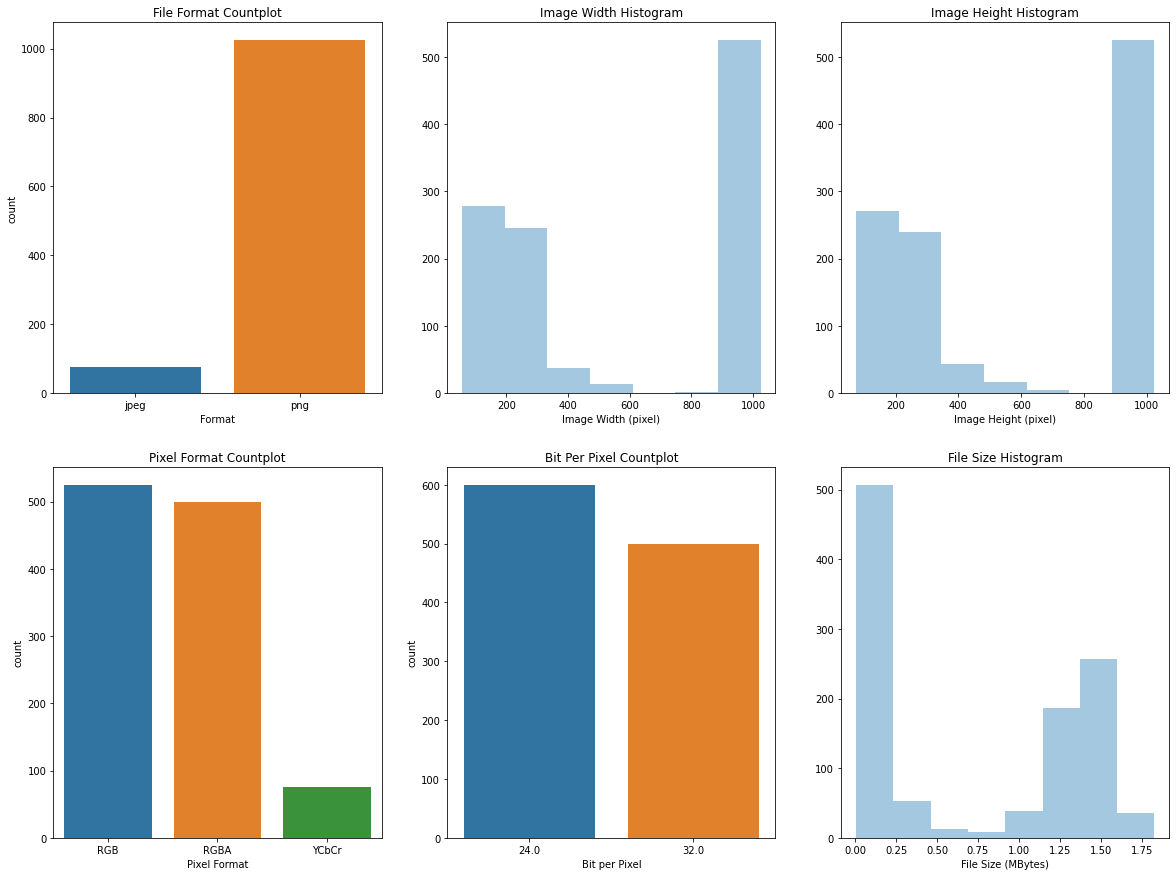

In [10]:
#@title Create countplot and histogram for all item in the dataframe

import seaborn as sns
import matplotlib.pyplot as plt

f, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3, figsize = (20,15))

ax1.set_title('File Format Countplot')
sns.countplot(df['Format'], ax=ax1)

ax2.set_title('Image Width Histogram')
sns.distplot(df['Image Width'], kde=False, ax=ax2)
ax2.set_xlabel('Image Width (pixel)')

ax3.set_title('Image Height Histogram')
sns.distplot(df['Image Height'], kde=False, ax=ax3)
ax3.set_xlabel('Image Height (pixel)')

ax4.set_title('Pixel Format Countplot')
sns.countplot(df['Pixel Format'], ax=ax4)

ax5.set_title('Bit Per Pixel Countplot')
sns.countplot(df['Bit per Pixel'], ax=ax5)

ax6.set_title('File Size Histogram')
sns.distplot(df['File Size'], kde=False, ax=ax6)
ax6.set_xlabel('File Size (MBytes)')